# Problem:

<h3 style="color:#4e4b4b;">we need to define the reasons for employees satisfaction and attrition in the company.</h3>

# Business task:

<h3 style="color:#4e4b4b;">Determine the types of factors that affect employee satisfaction. By analyzing the factors, we can understand what we need to change to improve employee job satisfaction and thus reduce the attrition.</h3>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [13]:
path="WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(path)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<h5 style="color:black;">Attrition is our target value which has no missing value.</h5>

<h5 style="color:black;">It's very good that we are having a complete dataset, there is no any missing values in dataset.</h5>

In [31]:
fig = px.pie(df, names = 'Attrition', title = 'Attrition Raio', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

# 1.How Is Attrition Affected by Gender?

In [32]:
attrition_yes = df.query("Attrition == 'Yes'")

In [33]:
fig = px.histogram(attrition_yes, x = attrition_yes['Gender'],
                      title = 'Attrition X Gender', text_auto = 'd3-format')
fig.show()

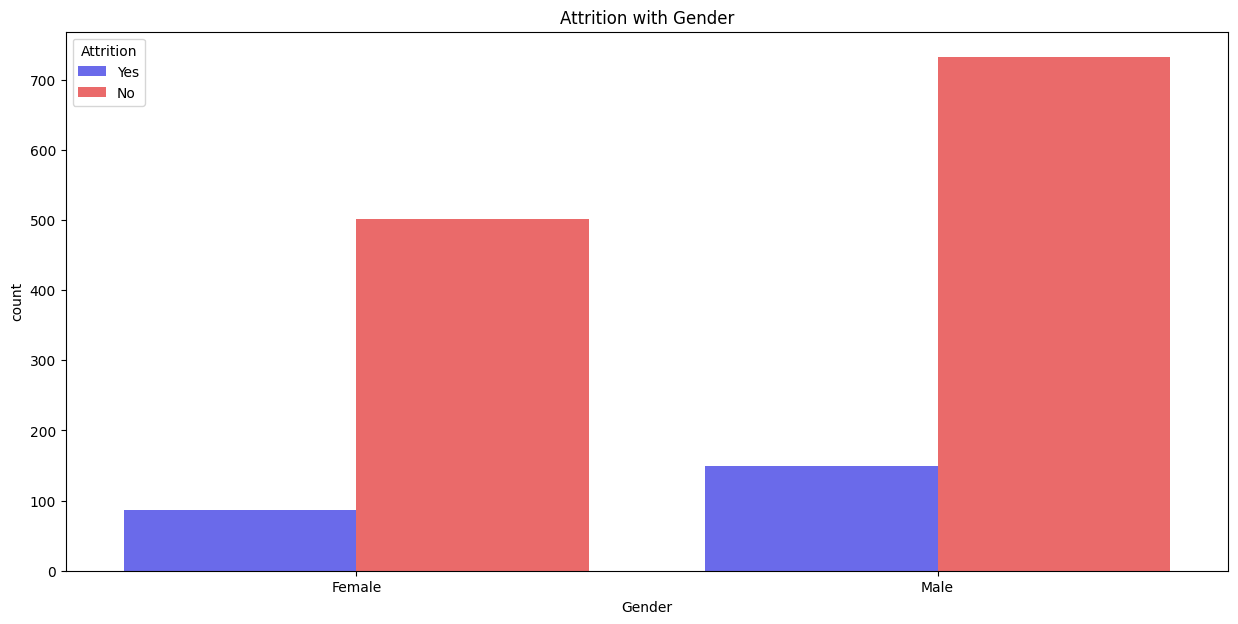

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(x='Gender', hue='Attrition', data=df, palette='seismic')
plt.title("Attrition with Gender")
plt.show()

#  2.How Is Attrition Affected by business travels?¶


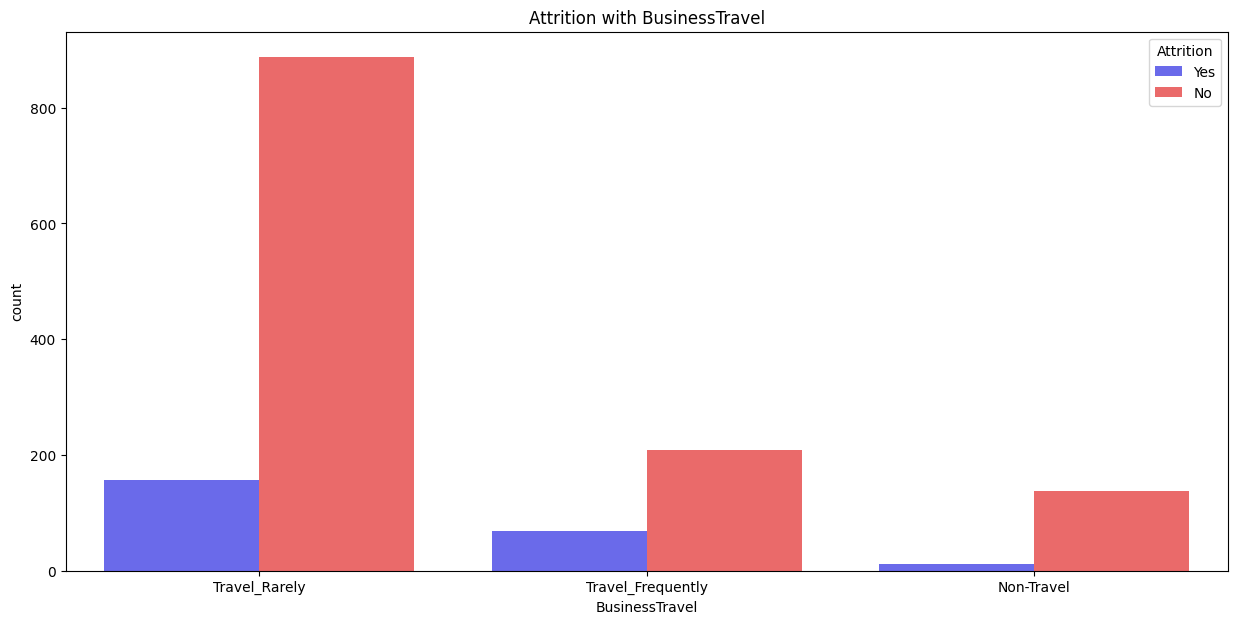

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='seismic')
plt.title("Attrition with BusinessTravel")
plt.show()

#  3. what is effect of the distance from home on attrition ?

In [40]:
df['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_5128\992114671.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\HP\AppData\Local\Temp\ipykernel_5128\992114671.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms

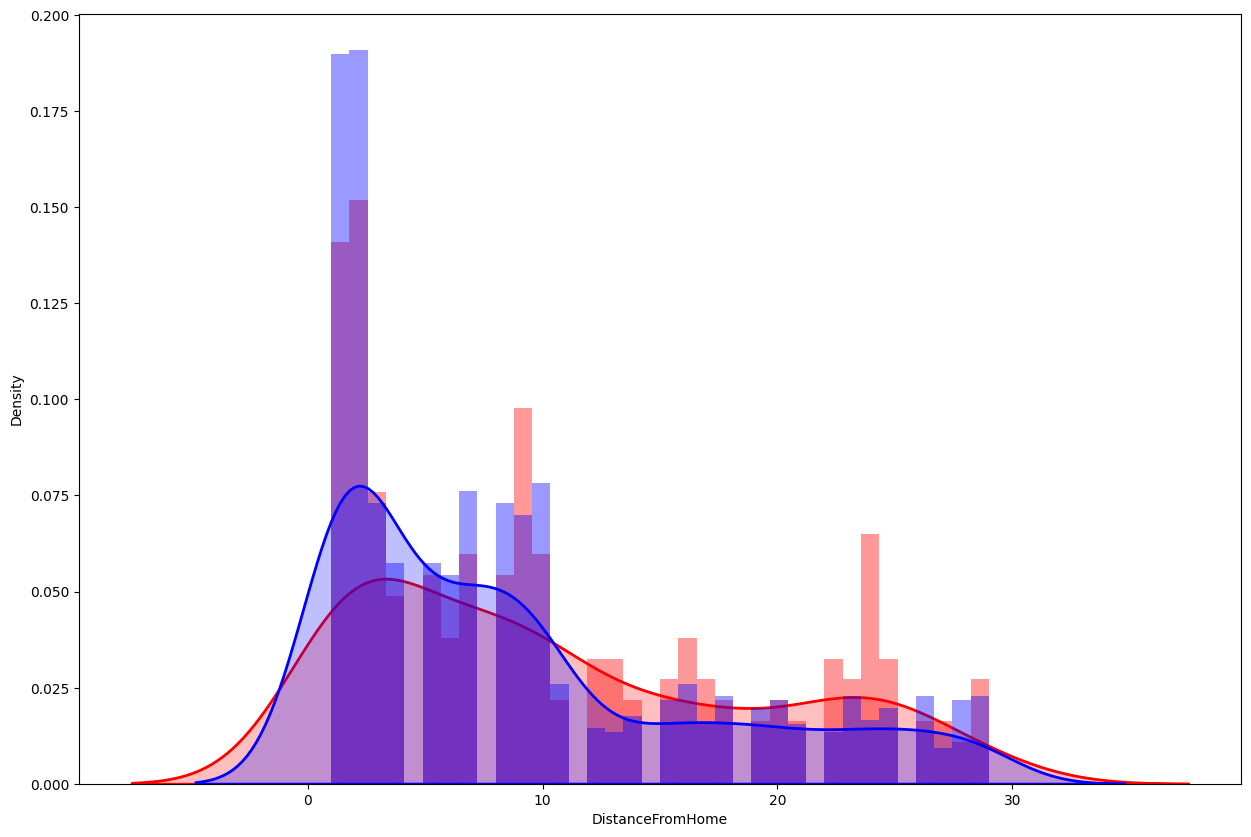

In [46]:
yes_attrition_df = (df[df['Attrition']=='Yes']).copy()
no_attrition_df = (df[df['Attrition']=='No']).copy()
plt.figure(figsize=(15,10))
sns.distplot(yes_attrition_df['DistanceFromHome'], hist=True, kde=True, 
             bins=int(180/5), color = 'red', 
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Left the Organization")

sns.distplot(no_attrition_df['DistanceFromHome'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',  
             kde_kws = {'shade': True, 'linewidth': 2}, 
             label = "Stayed back organization")

plt.show()

#  4. What is the most Department of attritions ?

# 5. Does the Department of work impact attrition?

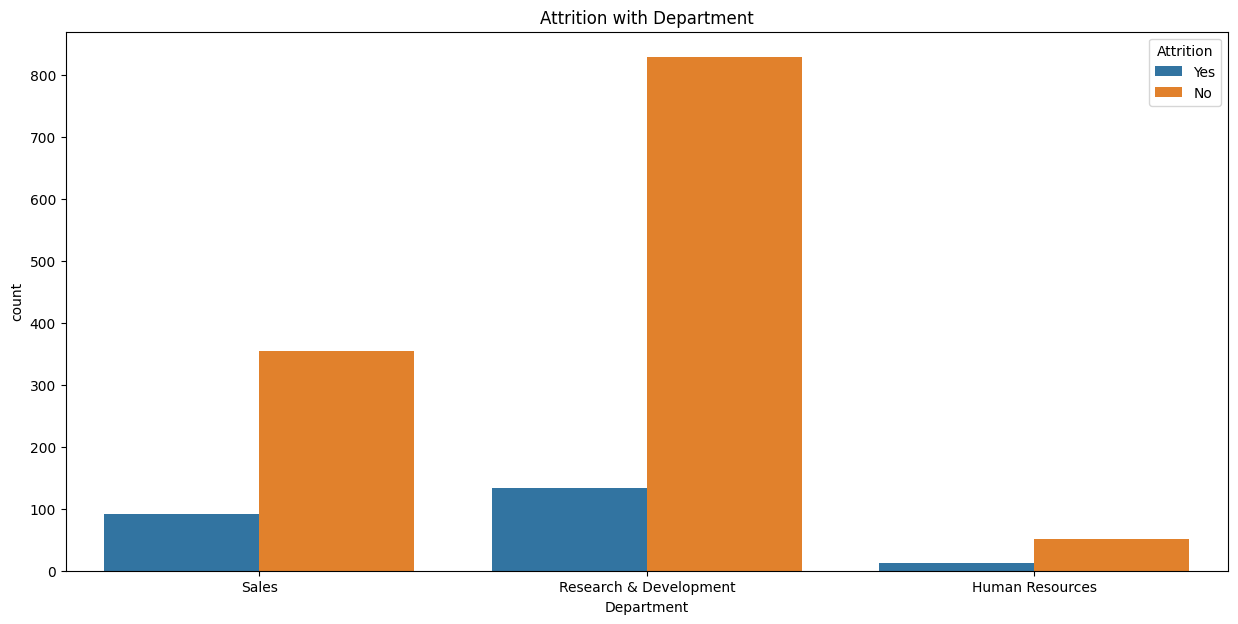

In [47]:
plt.figure(figsize=(15,7))
plt.title("Attrition with Department")
sns.countplot(x='Department', hue='Attrition', data=df);

# 6. what is effect of YearsWithCurrManager on attrition ?

<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

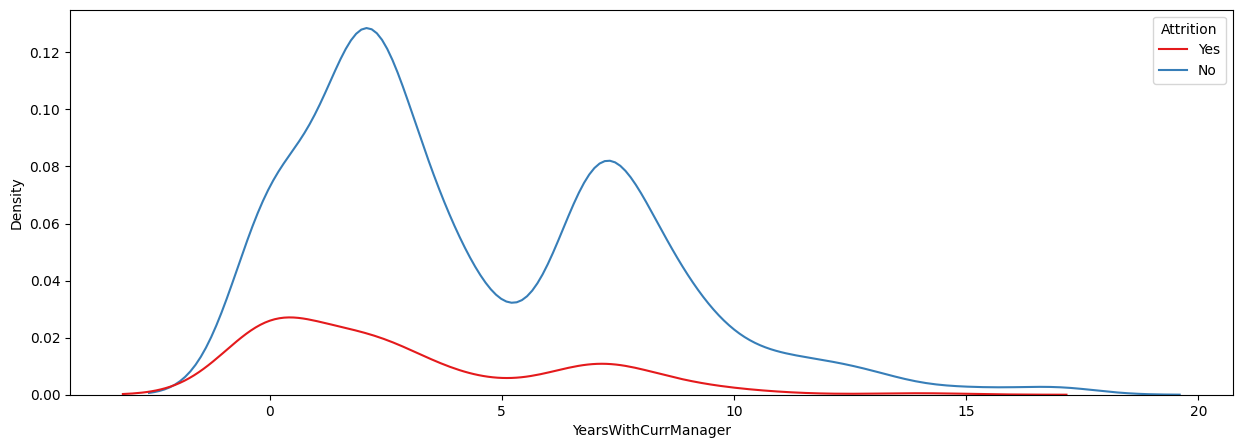

In [49]:
plt.figure(figsize=(15,5))

sns.kdeplot(data=df, x = "YearsWithCurrManager", hue="Attrition",palette='Set1')

# 7. What is the most job role of attritions ?

In [50]:
fig = px.histogram(attrition_yes, x = attrition_yes['JobRole'], template = 'plotly_dark',
                      title = 'Attrition X JobRole', text_auto = 'd3-format')
fig.show()

#  8. Is salary is one of the main reasons?
#  9. Is income the main factor towards employee attrition?
#  10. How much does income matter?

In [52]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_5128\2897275716.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




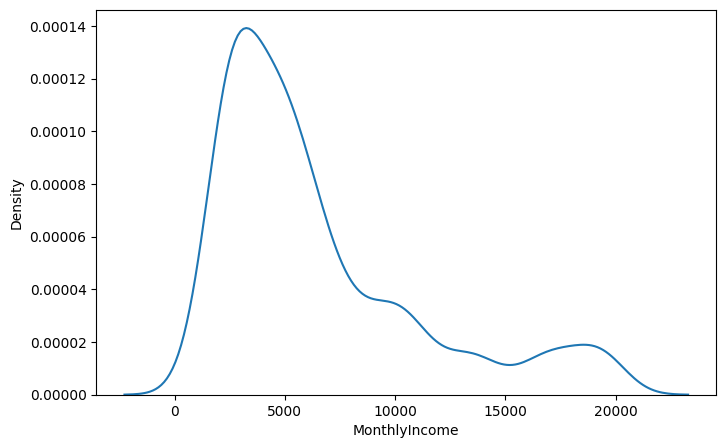

In [51]:
plt.figure(figsize=(8,5))
sns.distplot(df['MonthlyIncome'], hist=False)
plt.show()

In [53]:
attrition_monthincome = df[['Attrition', 'MonthlyIncome']]

In [54]:
fig = px.box(attrition_monthincome, x='Attrition', y='MonthlyIncome', color='Attrition', 
             points='all',color_discrete_map={'No': 'blue', 'Yes': 'red'})

fig.update_layout(
    title='Attrition by Monthly Income',
    xaxis=dict(title='Attrition'),
    yaxis=dict(title='Monthly Income'),
    template='seaborn'
    
)

fig.show()

# 12. Do Education Field play a role?

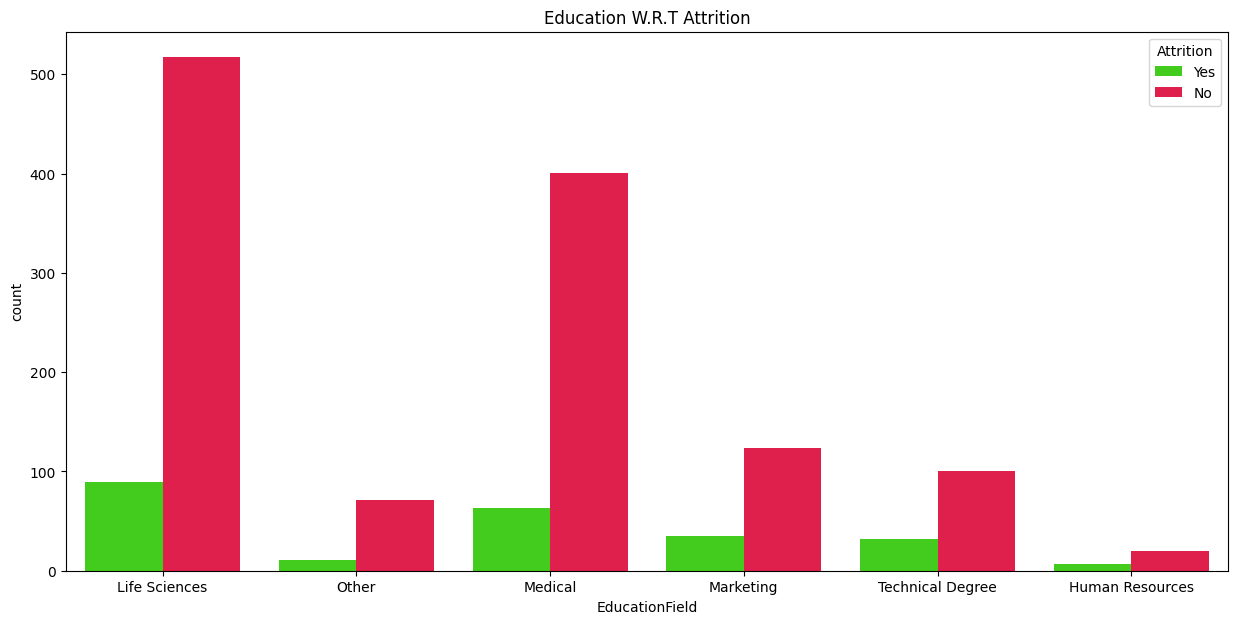

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['EducationField'], hue='Attrition', data=df, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

# 13. Do overtime stresses employees and makes them have to leave? 

In [56]:
overtime_counts = df.groupby('OverTime')['Attrition'].value_counts().to_frame()

sizes = overtime_counts.values
labels = overtime_counts.index

# sizes = [sizes[2], sizes[3]]

labels = [labels[2][1], labels[3][1]]
# sizes[3]

In [57]:
overtime_counts

count
OverTime Attrition       
No       No           944
         Yes          110
Yes      No           289
         Yes          127

In [58]:
fig = go.Figure()
fig.add_trace(go.Pie(values= [289, 127],title = 'Overtime X Attrition', labels=labels, hole=0.5))

fig.update_layout(autosize=False, width=500, height=450)
fig.show()

# 14. Is it possible that employees are leaving because of the work environment?
# 15. How does the environment satisfaction impact attrition?

In [64]:
At = df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts().to_frame()

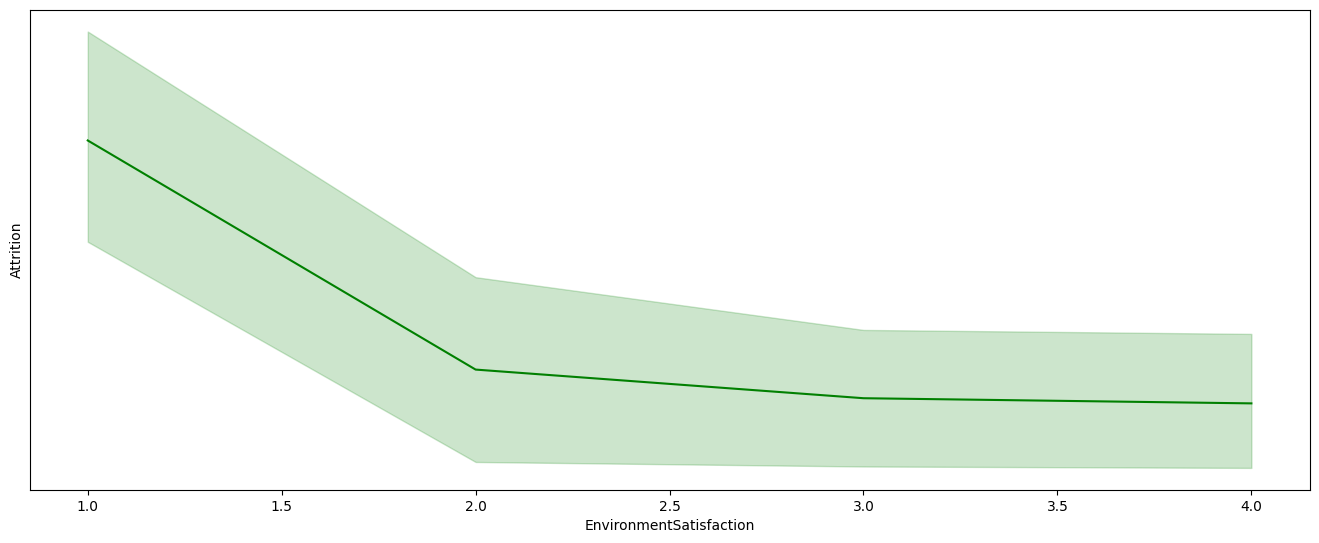

In [66]:
sns.lineplot(data=df, x='EnvironmentSatisfaction',  y='Attrition',color='green')
plt.subplots_adjust( left=0, right=2, top=1, bottom=0)
plt.show()

# 16. What factors are contributing more to employee attrition?

<h3 style="color:#4e4b4b;">Based on our previous analyses, we can say that the most important factors affecting employees attrition are:
</h3>

```1. Salary of the month: We found that employees with salaries of less than 5K are the most likely to leave their jobs```

```2.work enviroment: most of the employees leave their jobs when they are not comfortable in their work space```

```3. overtime when employees puted in stress and overtime, more than 30% leave the company```

# 17. What type of measures should the company take in order to retain their employees?

```1. We can increase the monthly salary a little or make bonuses```

```2. We can ask employees why they are not satisfied with the environment in which they work and try to fix this as much as possible```

```3. We make a schedule for employees to limit overtime, and if there is any employee who has a problem, we do not force him to work overtime```

# 18. what is effect of age on attrition ?

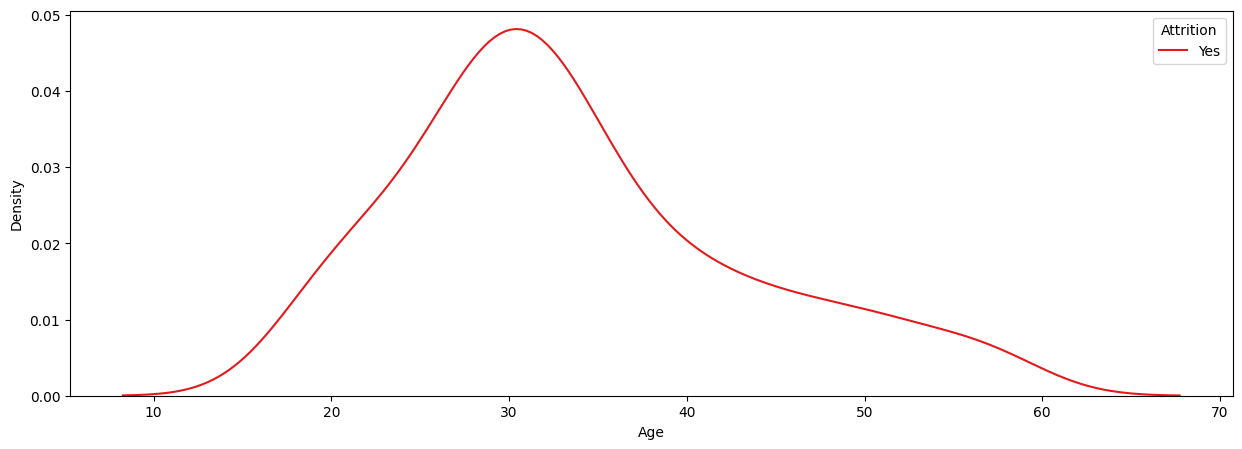

In [68]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=attrition_yes, x = "Age", hue="Attrition",palette='Set1')
plt.show()

# 19. How does self Job Satisfaction impact the Attrition?

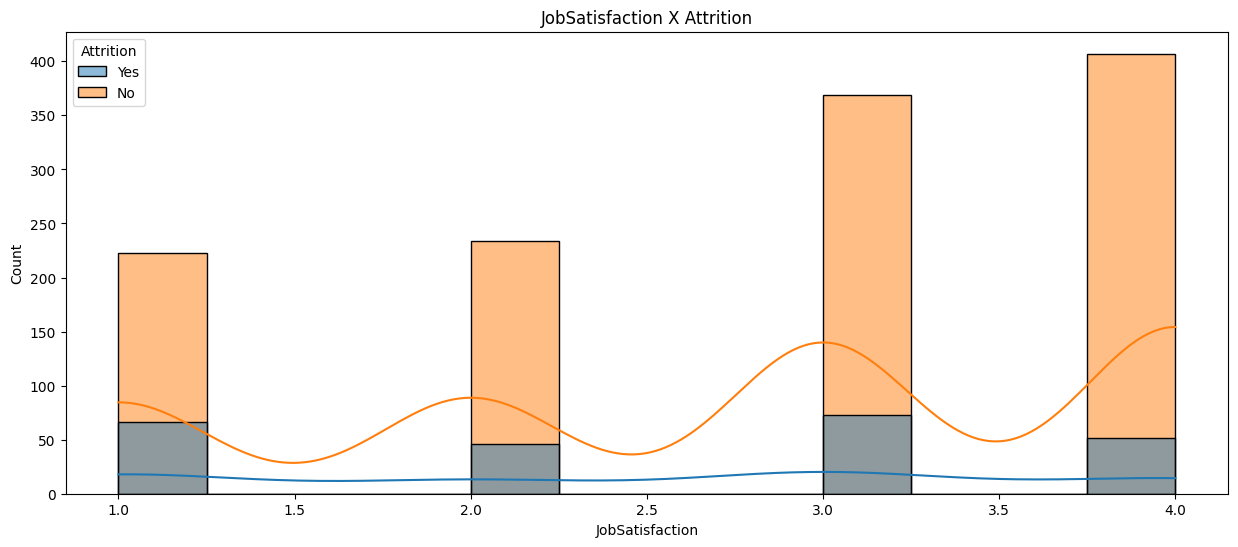

In [69]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='JobSatisfaction', hue='Attrition', kde=True)
plt.title(label='JobSatisfaction X Attrition')

plt.show()

When employees are 'satisfay' and 'very satisfay' they are more inclined to stay in their jobs¶

# 20. Does company stocks for employees impact attrition?

In [70]:
fig = px.pie(attrition_yes, names = 'StockOptionLevel', title = 'Stock option level X Attrition', template = 'gridon')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

60% of employees with no right 'Option' to get company stocks are leaving the company

# 21. How does Work Life Balance impact the overall attrition rates?

In [71]:
WLB = df.groupby('WorkLifeBalance')['Attrition'].value_counts().to_frame()
WLB

count
WorkLifeBalance Attrition       
1               No            55
                Yes           25
2               No           286
                Yes           58
3               No           766
                Yes          127
4               No           126
                Yes           27

We can say that with work life balance "3" we have the most attrition whether yes or no

# 22. How does work experience affect attrition?

In [72]:
WE = attrition_yes.groupby('TotalWorkingYears')['Attrition'].value_counts().to_frame()
WE

,,count
TotalWorkingYears,Attrition,
0,Yes,5
1,Yes,40
2,Yes,9
3,Yes,9
4,Yes,12
5,Yes,16
6,Yes,22
7,Yes,18
8,Yes,16


C:\Users\HP\AppData\Local\Temp\ipykernel_5128\2216417483.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




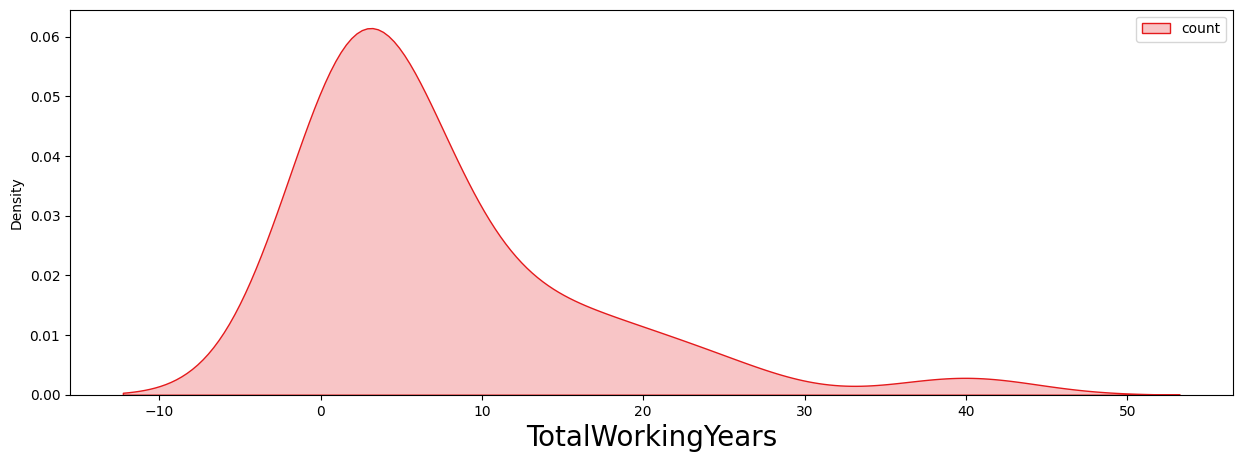

In [73]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=WE, palette='Set1', shade=True)
plt.xlabel('TotalWorkingYears', fontsize=20)

plt.show()

According to the graph, the more years of work (experience) the lower number of attrition (inverse relationship)

# 23. How does work duration in current role impact Attrition? 

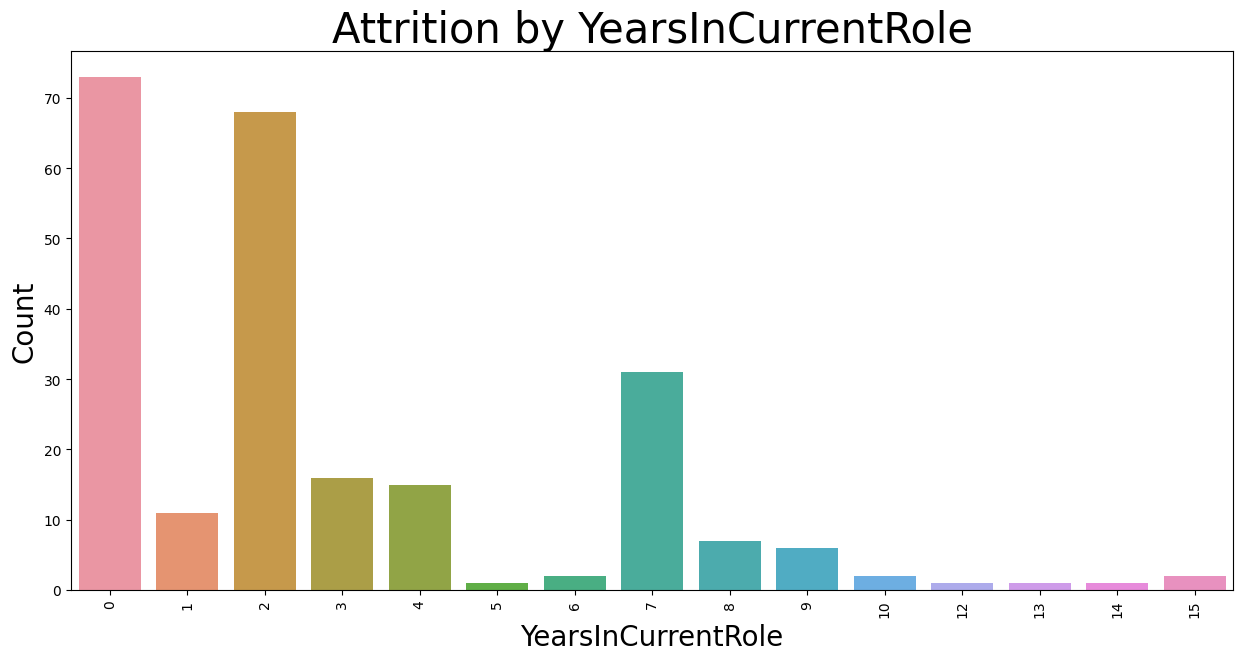

In [74]:
plt.figure(figsize=(15,7))
sns.countplot(x="YearsInCurrentRole", data=attrition_yes)
plt.xticks(rotation='vertical')
plt.title('Attrition by YearsInCurrentRole', fontsize=30)
plt.ylabel('Count', fontsize=20)
plt.xlabel('YearsInCurrentRole', fontsize=20)
plt.show()

# 24. Does Salary hike percentage impact Attrition?

In [75]:
PSH = attrition_yes.groupby('PercentSalaryHike')['Attrition'].value_counts().to_frame()
PSH

,,count
PercentSalaryHike,Attrition,
11,Yes,41
12,Yes,33
13,Yes,34
14,Yes,24
15,Yes,18
16,Yes,14
17,Yes,14
18,Yes,13
19,Yes,9


C:\Users\HP\AppData\Local\Temp\ipykernel_5128\3421779989.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




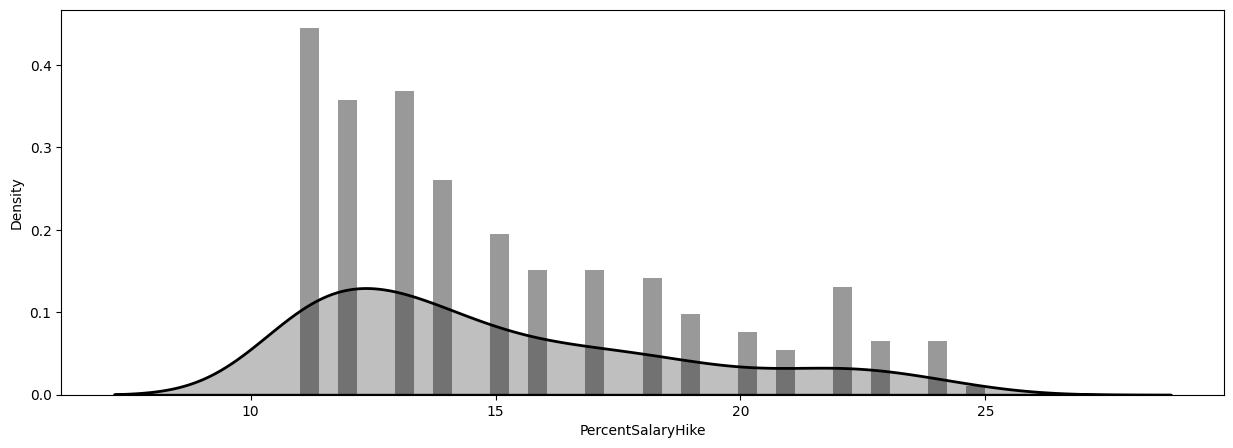

In [76]:
plt.figure(figsize=(15,5))
sns.distplot(attrition_yes['PercentSalaryHike'], hist=True, kde=True, 
             bins=int(180/5), color = 'black', 
             kde_kws = {'shade': True, 'linewidth': 2}
              )
plt.show()

Most of the employees leave the company because the hike percentage salary is not good. I think this makes them look for a company with a better salary


# 25. Are managers a reason of people resigning ?

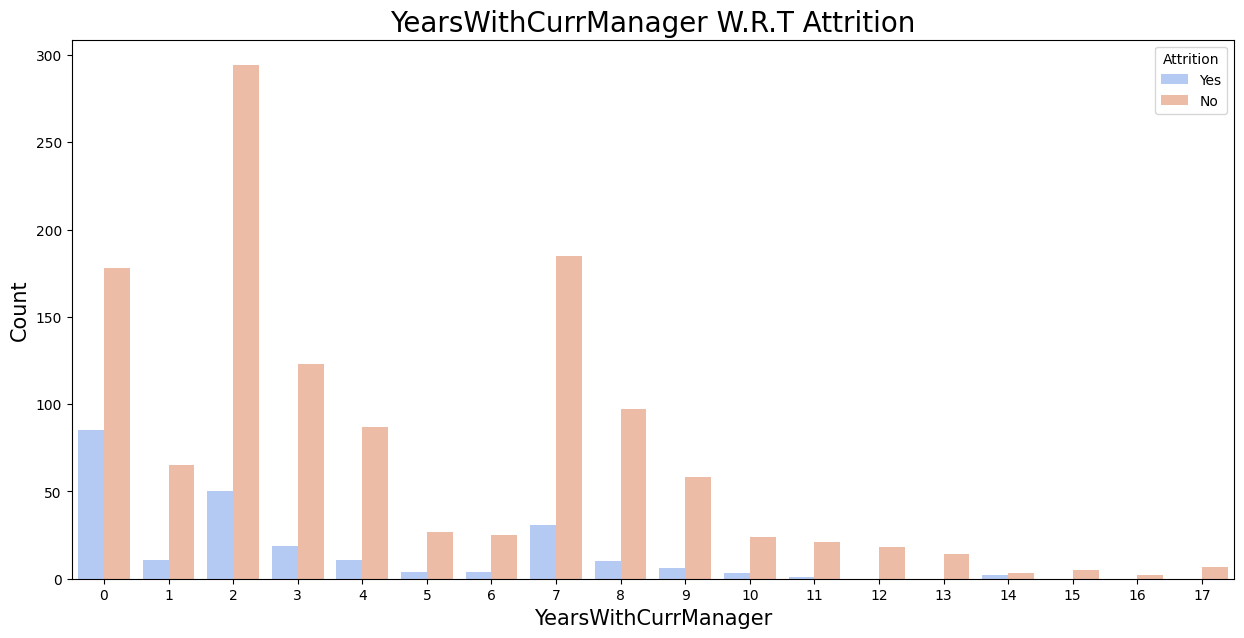

In [77]:
plt.figure(figsize=(15,7))

sns.countplot(x=df['YearsWithCurrManager'], hue='Attrition', data=df, palette="coolwarm")
plt.title('YearsWithCurrManager W.R.T Attrition', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('YearsWithCurrManager', fontsize=15)
plt.show()

The real reason people quit their jobs is because the managers charged with ensuring their employees' success don't care enough to meet their needs as valued employees and human beings


# 26. What business value does the model bring?

<h3>We have a background on what is going on inside the company and why attrition happen and here are some tips for companies:
<h3>

```Create a Suitable Working Environment```

```Engage with your Employees```

```Give a fair increase in salary```


```Hire the Right People```


```Train employees with effective tools```

# 27. Which business unit faces the attrition problem?

The bar chart displays the attrition rate by department according to this we can see that "Research & Development" have the most attrition problem

 some advices:
<ol>
    <li>Search for the cause of high attrition in this section and try to solve it.</li>
    <li>Asking employees to suggest solutions and try to implement them.</li>
</ol>


# What role does gender and age play in this workplace?

Gender and age can impact company attrition, but the extent varies. Women may face challenges like work-life balance and gender bias, while older employees may retire. However, attrition is influenced by various factors. Companies can reduce attrition by promoting diversity, offering career development opportunities, and creating an inclusive work environment.


# Are more educated people more likely to leave?

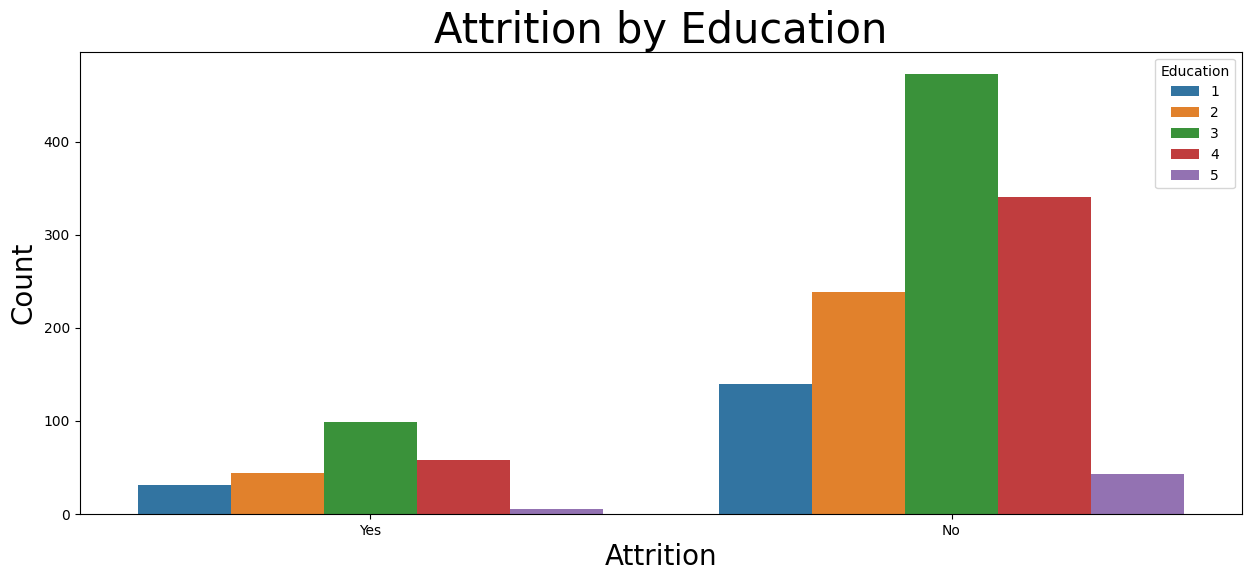

In [78]:
plt.figure(figsize=(15,6))

sns.countplot(x=df['Attrition'], hue='Education', data=df)

plt.title('Attrition by Education', fontsize=30)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Attrition', fontsize=20)
plt.show()

# Which Education Field is more likely to leave?

In [79]:
plt.figure(figsize=(15,6))

fig = px.bar(data_frame=df, y='EducationField', orientation='h', color='Attrition',
             title='Attrition by Job Role',
             labels={'EducationField': 'EducationField', 'Attrition': 'Attrition'},
             category_orders={"EducationField": df["EducationField"].value_counts().index.tolist()})

fig.show()

<Figure size 1500x600 with 0 Axes>

# Is JobLevel equivalent to performance? Can we create a feature to measure this?

<Axes: >

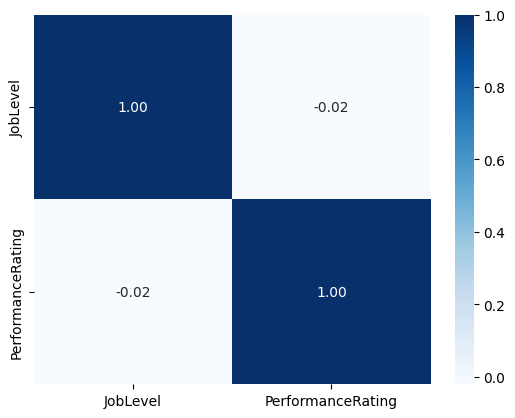

In [80]:
subset_df = df[['JobLevel', 'PerformanceRating']]
sns.heatmap(subset_df.corr(), cmap='Blues', annot=True, fmt='.2f')

# What factors contribute to retaining high performing employees?

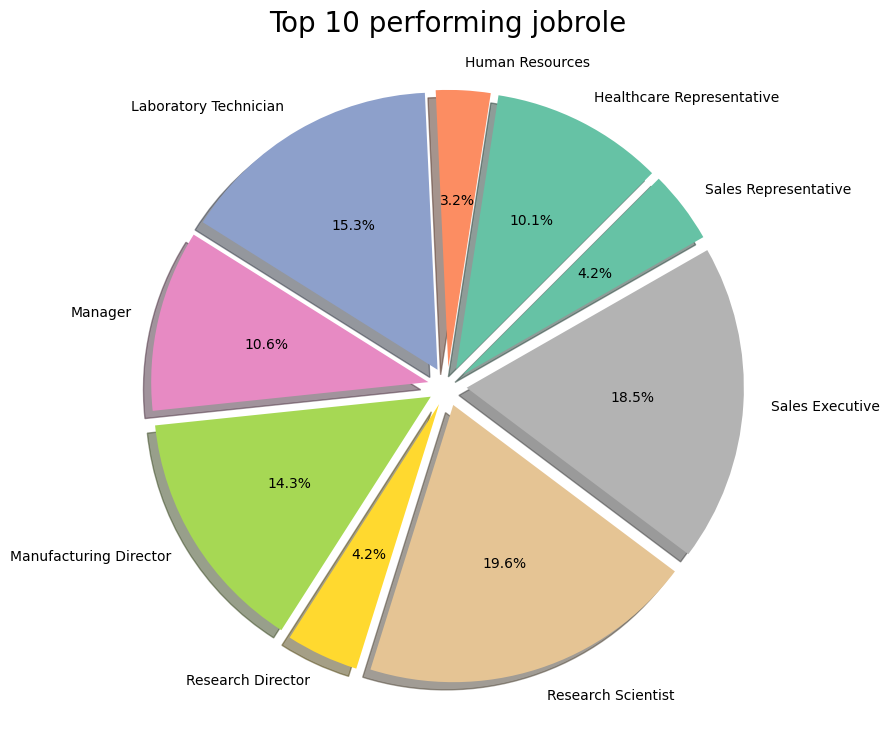

In [81]:
best_employees = df[(df["PerformanceRating"] == 4) & (df["Attrition"] == "No")]
counts = best_employees.groupby("JobRole").size()

_, ax = plt.subplots(figsize=(9, 9))

ax.pie(counts, labels=counts.index, colors=plt.cm.Set2.colors, explode=[0.07] * len(counts), shadow=True, startangle=45, autopct="%1.1f%%")

plt.title('Top 10 performing jobrole', fontsize=20)


plt.show()

# How does satisfaction and work-life balance relate to employee retention?

In [82]:
hpe = df[df['PerformanceRating'] == 4 ]
factors = hpe[['JobSatisfaction', 'YearsAtCompany', 'WorkLifeBalance', 'EnvironmentSatisfaction']].mean()

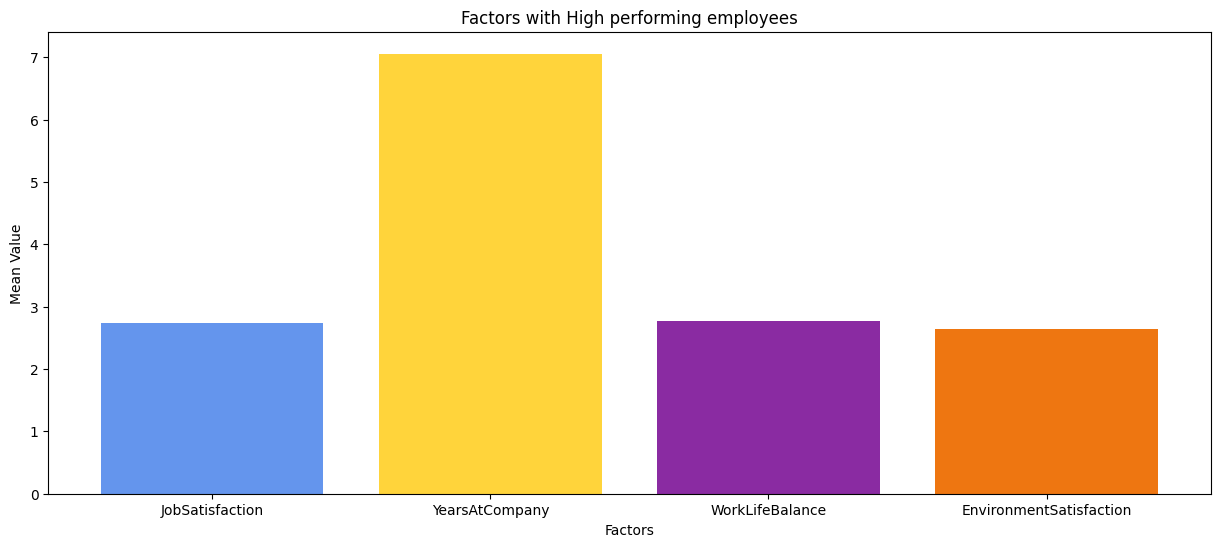

In [83]:
plt.figure(figsize=(15,6))

plt.bar(factors.index, factors.values , color=['#6495ED','#FFD43B','#8A2BA2','#EE7611'])
plt.xlabel('Factors')
plt.ylabel('Mean Value')
plt.title('Factors with High performing employees')

plt.show()

# What is the rate of resignations each year versus the rate of new appointments?

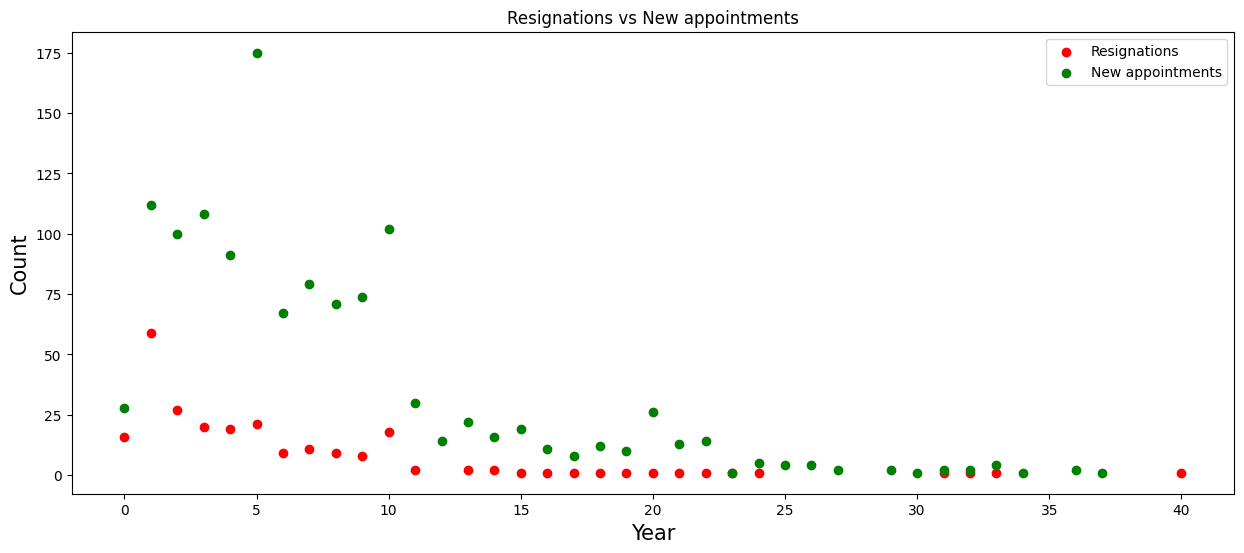

In [84]:
resignations = df[df['Attrition'] == 'Yes']['YearsAtCompany'].value_counts().sort_index()
new_appointments = df[df['Attrition'] == 'No']['YearsAtCompany'].value_counts().sort_index()

plt.figure(figsize=(15,6))
plt.scatter(resignations.index, resignations.values, label='Resignations', c='red')
plt.scatter(new_appointments.index, new_appointments.values, label='New appointments', c='green')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Resignations vs New appointments')
plt.legend()

plt.show()

# Conclusion:

After analyzing the factors contributing to attrition within the company, I have come up with several recommendations to help reduce attrition:
<ol>
    <li>Improve employee engagement: Implement strategies to enhance employee engagement, such as regular feedback sessions, recognition programs, and opportunities for professional growth. Engaged employees are more likely to stay with the company.</li>
    <li>Enhance work-life balance: Promote a healthy work-life balance by offering flexible work arrangements, encouraging employees to take breaks, and providing support for personal commitments. This can help reduce burnout and increase job satisfaction.</li>
    <li>Strengthen communication channels: Foster open and transparent communication within the organization. Encourage managers to have regular check-ins with their team members, address concerns promptly, and provide clear expectations and feedback.</li>
    <li>Offer competitive compensation and benefits: Conduct a thorough review of the company's compensation and benefits packages to ensure they are competitive within the industry. Providing fair and attractive rewards can help retain talented employees.</li>
    <li>Provide opportunities for skill development: Invest in training and development programs to help employees enhance their skills and advance their careers within the company. This can increase job satisfaction and loyalty.</li>
    <li>Foster a positive work culture: Create a supportive and inclusive work environment where employees feel valued and respected. Encourage teamwork, collaboration, and a sense of belonging.</li>
    <li>Conduct exit interviews: When employees do leave the company, conduct exit interviews to gather feedback on their reasons for leaving. This information can help identify patterns and areas for improvement.</li>

</ol>


It is important to note that reducing attrition is an ongoing process that requires continuous monitoring and adjustment. By implementing these recommendations, the company can create a more engaging and supportive workplace, ultimately reducing attrition rates.